# Plot XAS and XES detector

This log is part of the experiment 20139026 at beamline DiProi at Fermi/Trieste (Oct.2017)

Here we varry the pump-probe delay at 290 eV for CO/Ru(0001)

### Import

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
from os import walk

### Define useful functions

In [2]:
def discover_files(path):
    # looks in the given directory and returns the filenames,
    for (dirpath, dirnames, filenames) in walk(path):
        break
    return filenames

def load_h5file(file_path):
    h5file = h5py.File(file_path, 'r')
    return h5file

### Load data

In [75]:
dataset = 2
file_path = '../01_data/04_XAS_pp/XAS00%d/'%dataset
file_names = discover_files(file_path)

n_shots  = 300
n_bins   = 1000 
n_delays = len(file_names)
nx,ny = 1236, 1626
thr = 20 #threshold filtering

XAS_image_avg = np.zeros([nx,ny])
XES_image_avg = np.zeros([nx,ny])

for i in range(n_delays):
    print '%d/%d - %s '%(i+1,n_delays,file_names[i])
    h5file = h5py.File(file_path+file_names[i], 'r')
    XAS_image = h5file['/Laser/BaslerImage2'].value
    XAS_image[XAS_image<thr]=0
    XAS_image_avg += np.sum(XAS_image,axis=0)
    XES_image = h5file['/Laser/BaslerImage1'].value
    XES_image[XES_image<thr]=0
    XES_image_avg += np.sum(XES_image,axis=0)
XAS_image_avg /= float(n_delays*n_shots)
XES_image_avg /= float(n_delays*n_shots)

1/19 - E289p06eV_Hor_350358521.h5 
2/19 - E289p06eV_Hor_350359029.h5 
3/19 - E289p06eV_Hor_350359449.h5 
4/19 - E289p06eV_Hor_350359874.h5 
5/19 - E289p06eV_Hor_350360323.h5 
6/19 - E289p06eV_Hor_350360745.h5 
7/19 - E289p06eV_Hor_350361158.h5 
8/19 - E289p06eV_Hor_350361581.h5 
9/19 - E289p06eV_Hor_350362003.h5 
10/19 - E289p06eV_Hor_350368502.h5 
11/19 - E289p06eV_Hor_350368912.h5 
12/19 - E289p06eV_Hor_350369330.h5 
13/19 - E289p06eV_Hor_350369757.h5 
14/19 - E289p06eV_Hor_350370862.h5 
15/19 - E289p06eV_Hor_350371276.h5 
16/19 - E289p06eV_Hor_350371692.h5 
17/19 - E289p06eV_Hor_350372115.h5 
18/19 - E289p06eV_Hor_350372538.h5 
19/19 - E289p06eV_Hor_350372955.h5 


In [97]:
print 'Total number of shots: %d '% (n_delays*n_shots)

Total number of shots: 5700 


### Plot the average images and histograms

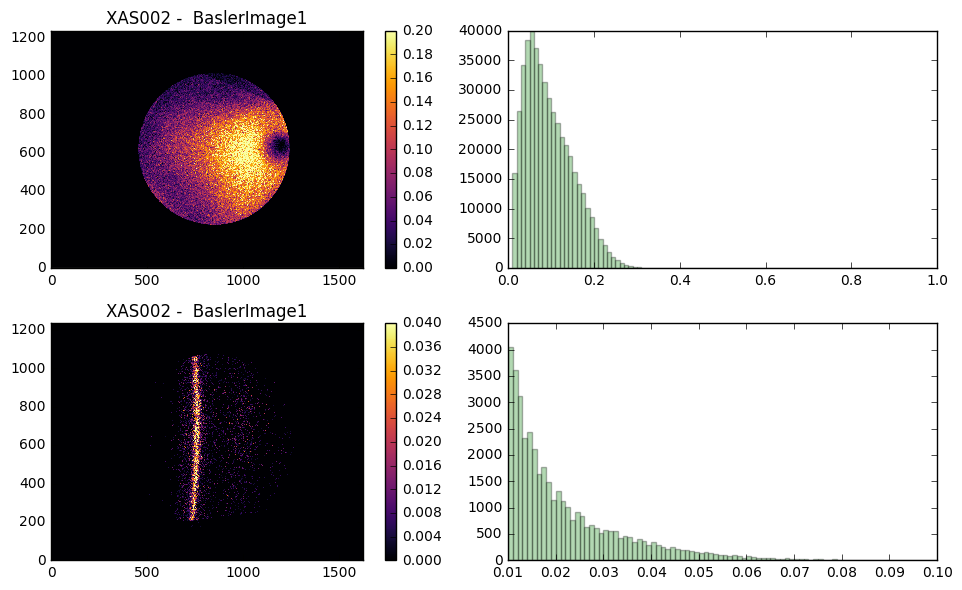

In [96]:
cmap = 'inferno'
i=100
#img = XAS_image_avg

plt.figure(figsize=[10,6])
plt.subplot(2,2,1)
plt.imshow(XAS_image_avg,vmin=0,vmax=0.2,origin='lower',interpolation='None',cmap=cmap)
plt.title('XAS00%d -  BaslerImage1'%dataset)
plt.colorbar()

plt.subplot(2,2,2)
bi,bf,db = 0.01,1,0.01
bins = np.arange(bi,bf,db)
hy,hx = np.histogram(XAS_image_avg,bins=bins)
hx = hx[:-1]
plt.bar(hx,hy,width=db,color='green',alpha=0.3)

#img = XES_image_avg
plt.subplot(2,2,3)
plt.imshow(XES_image_avg,vmin=0,vmax=0.04,origin='lower',interpolation='None',cmap=cmap)
plt.title('XAS00%d -  BaslerImage1'%dataset)
plt.colorbar()

plt.subplot(2,2,4)
bi,bf,db = 0.01,0.1,0.001
bins = np.arange(bi,bf,db)
hy,hx = np.histogram(XES_image_avg,bins=bins)
hx = hx[:-1]
plt.bar(hx,hy,width=db,color='green',alpha=0.3)
plt.tight_layout()

plt.savefig('/Users/fivos/Desktop/XAS002.png',dpi=300)
plt.show()

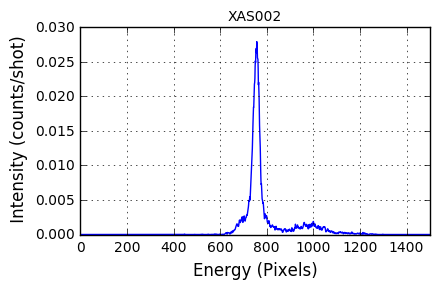

In [95]:
plt.figure(figsize=[4.5,3])

plt.plot(np.average(XES_image_avg[200:1050,:],axis=0),alpha=1)
plt.xlabel('Energy (Pixels)',size=12)
plt.ylabel(' Intensity (counts/shot)',size=12)
plt.grid()
plt.xlim(0,1500)
plt.title('XAS00%d'%dataset,size=10)
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/XAS002_XES.png',dpi=300)

plt.show()